In [1]:
import fiona
import rasterio
import rasterio.mask
from glob import glob
import pandas as pd
from osgeo import gdal

In [2]:
folder= '/hydros/MengyuChen/mrmsPrecRate/*.tif'
fnames= glob(folder)

In [8]:
dr= pd.date_range('20170825', '20170901', freq='120S')

In [9]:
with fiona.open('/home/ZhiLi/CRESTHH/data/HoustonCase/study_area/Houston_basin.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [10]:
RR= []
for date in dr:
    fname= date.strftime('/hydros/MengyuChen/mrmsPrecRate/PrecipRate_00.00_%Y%m%d-%H%M%S.grib2-var0-z0.tif')

    try:
        with rasterio.open(fname) as src:
            out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
            out_meta = src.meta
            out_image[out_image<0]= np.nan
            RR.append(np.nanmean(out_image))
    except:
        RR.append(np.nan)

<Figure size 1080x432 with 0 Axes>

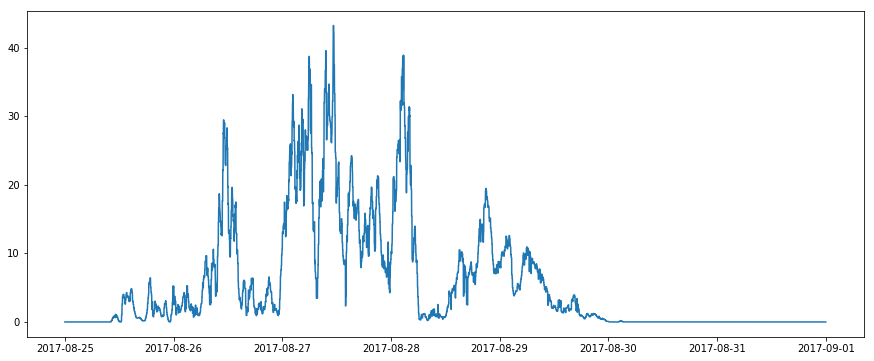

In [11]:
plt.figure(figsize=(15,6))
plt.plot(dr, RR)

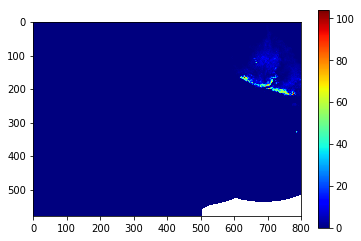

In [76]:
arr= gdal.Open(fnames[55400]).ReadAsArray()
arr[arr<0]= np.nan
plt.imshow(arr, cmap='jet')
plt.colorbar()